## Inferential Statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chisquare

from utils import get_digit_df

#### Chi Square Goodness of Fit Test

The Chi-square goodness of fit test is a statistical hypothesis test used to determine whether a variable is likely to come from a **specified distribution** or not.

Here, the digit distribution is expected to differ from **the uniform distribution**

##### _Null hypothesis H0_: The recorded digits with respect to prizes and years are uniformly distributed
##### _Alternative hypothesis H1_: They come from different distribution (might be fraudulent)

In [2]:
df = pd.read_csv("data.csv", dtype=str)
df['Nam'] = pd.DatetimeIndex(df['Ngay']).year
df['Thu'] = df['Thu'].astype(int)
df

,Thu,Ngay,G8,G7,G6,G5,G4,G3,G2,G1,DB,Nam
0,2,2023-04-10,96,067,3039 1834 0256,2658,12040 61730 61467 95275 06567 26533 97288,43472 46275,85665,26196,331863,2023
1,7,2023-04-08,41,530,1460 7105 3006,4405,45400 39392 18603 08026 38131 08344 69763,23994 55504,27272,00696,744278,2023
2,2,2023-04-03,90,064,6426 7669 7549,1024,07989 15931 86157 15220 80132 42218 77636,18219 22169,28645,90215,551507,2023
3,7,2023-04-01,94,822,2009 3534 1391,9752,02914 85150 64414 92389 87819 88191 03267,40381 81358,58896,52858,819946,2023
4,2,2023-03-27,17,533,1806 0536 9426,3721,26461 50275 84709 09153 63364 09323 91021,94553 70308,65629,71984,196165,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
195,7,2021-02-13,33,789,8203 8964 1197,5336,16097 20404 53589 63340 01982 84821 97736,30527 26707,62044,72420,346015,2021
196,2,2021-02-08,73,711,6308 3409 7873,5700,75778 46773 41235 44775 22681 59093 92033,88973 93760,67790,94856,502117,2021
197,7,2021-02-06,14,519,4105 9528 7678,8254,59392 08342 78720 78075 14692 73513 65585,09862 83242,55007,90406,530464,2021
198,2,2021-02-01,80,115,6820 9332 9013,5348,19754 83442 81350 36206 86234 77258 66479,59402 81165,33303,08207,722174,2021


In [3]:
MASK = 'Nam == 2022 and Thu == 7' # Change this MASK to make different filter
GIAI = 'G4'                       # Change GIAI to different prize (column)
SIGNIFICANT_LEVEL = 0.2           # Change SIGNIFICANT_LEVEL (ideally < 0.1)

In [4]:
if MASK != None and MASK != '':
    df_filter = df.query(MASK)
else:
    df_filter = df

df_digit = get_digit_df(df_filter, GIAI)

num_of_digits = len(df_digit[GIAI][0].split()[0])

for i in range(num_of_digits):
    df_digit[f'digit_{i+1}'] = df_digit[f'digit_{i+1}'].astype(int)

df_digit

,Nam,Thu,G4,digit_1,digit_2,digit_3,digit_4,digit_5
0,2022,7,13760,1,3,7,6,0
1,2022,7,03190,0,3,1,9,0
2,2022,7,76015,7,6,0,1,5
3,2022,7,66435,6,6,4,3,5
4,2022,7,88247,8,8,2,4,7
...,...,...,...,...,...,...,...,...
366,2022,7,46916,4,6,9,1,6
367,2022,7,45868,4,5,8,6,8
368,2022,7,43413,4,3,4,1,3
369,2022,7,49273,4,9,2,7,3


In [5]:
def chi2_test(hist, msg):
    stats, pvalue = chisquare(hist, axis=0)

    if pvalue < SIGNIFICANT_LEVEL:
        print(
            f"{msg}: Statistics {stats:.3f}, Pvalue {pvalue:.5f}, indicates Not Uniformly Distributed")
    else:
        print(
            f"{msg}: Statistics {stats:.3f}, Pvalue {pvalue:.5f}, not enough evidence")


One-Way Chi square test for G4, with filter Nam == 2022 and Thu == 7
-------------------------------------------------------
Digit 1: Statistics 8.380, Pvalue 0.49635, not enough evidence
Digit 2: Statistics 14.040, Pvalue 0.12089, indicates Not Uniformly Distributed
Digit 3: Statistics 5.846, Pvalue 0.75519, not enough evidence
Digit 4: Statistics 7.841, Pvalue 0.55025, not enough evidence
Digit 5: Statistics 16.143, Pvalue 0.06396, indicates Not Uniformly Distributed
OVERALL: Statistics 8.973, Pvalue 0.43977, not enough evidence
-------------------------------------------------------



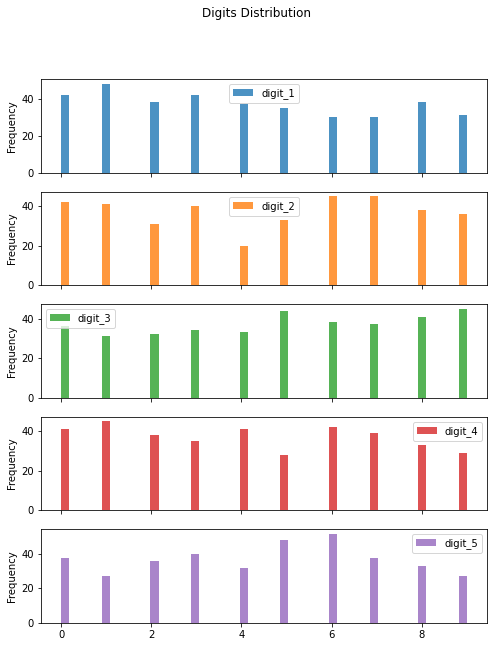

In [6]:
print(f'One-Way Chi square test for {GIAI}, with filter {MASK}')
print('-------------------------------------------------------')
overall_frequency = np.zeros(10)
for i in range(num_of_digits):
    hist, _ = np.histogram(df_digit[f'digit_{i+1}'], bins=10)

    overall_frequency += hist
    chi2_test(hist, f'Digit {i+1}')
    

chi2_test(overall_frequency, 'OVERALL')

print('-------------------------------------------------------')
df_digit[df_digit.columns[3:]].plot.hist(
    bins=50,
    subplots=True,
    figsize=(8,10),
    alpha=0.8,
    title='Digits Distribution')
print()